In [1]:
import numpy as np
import cv2
import skimage
import matplotlib.pyplot as plt
import os
from matplotlib.image import imread

In [2]:
img = cv2.imread(r'C:\Users\Rohit\Desktop\Uwaterloo 2.0\Snipped images\5.png')
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [3]:
#large view function
def large_view(image):
    plt.figure(figsize=(9,9))
    plt.imshow(image,cmap='gray')

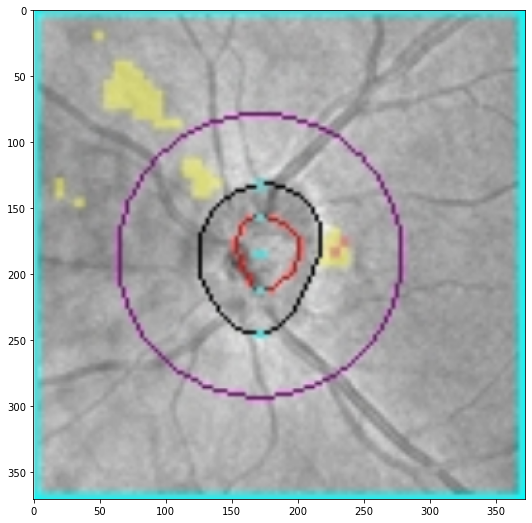

In [4]:
large_view(img_RGB)

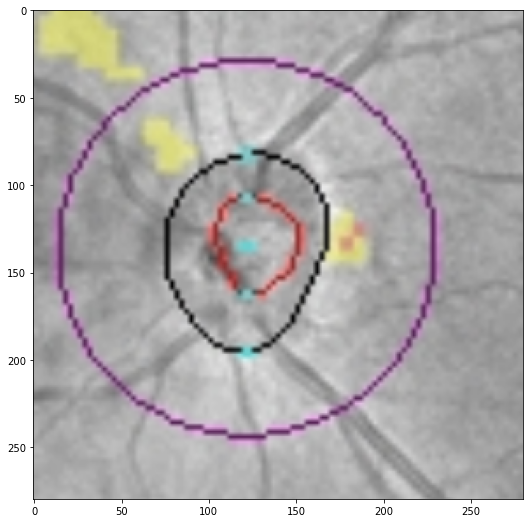

In [5]:
#Resize for uniform size
img_RGB = img_RGB[50:330,50:330]
large_view(img_RGB)

In [6]:
img_0 = img_RGB[:,:,0]
img_1 = img_RGB[:,:,1]
img_2 = img_RGB[:,:,2]

In [7]:
#modified algo/function
def binarize_adv(image_to_transform, threshold):
    img_0 = image_to_transform[:,:,0]
    img_1 = image_to_transform[:,:,1]
    img_2 = image_to_transform[:,:,2]
    # now, lets convert that image to a single greyscale image using convert()
    # the threshold value is usually provided as a number between 0 and 255, which
    # is the number of bits in a byte.
    # the algorithm for the binarization is pretty simple, go through every pixel in the
    # image and, if it's greater than the threshold, turn it all the way up (255), and
    # if it's lower than the threshold, turn it all the way down (0).
    # so lets write this in code. First, we need to iterate over all of the pixels in the
    # image we want to work with
    new_img = np.zeros(image_to_transform.shape)
    for x in range(image_to_transform.shape[1]):
        for y in range(image_to_transform.shape[0]):
            # for the given pixel at w,h, lets check its value against the threshold
            if (img_0[x,y]< threshold) & (img_2[x,y]<threshold) & (img_1[x,y]<threshold): #note that the first parameter is actually a tuple object
                # lets set this to zero
                new_img[x,y] = 255
            else:
                # otherwise lets set this to 255
                new_img[x,y] = 0
    #now we just return the new image
    return new_img

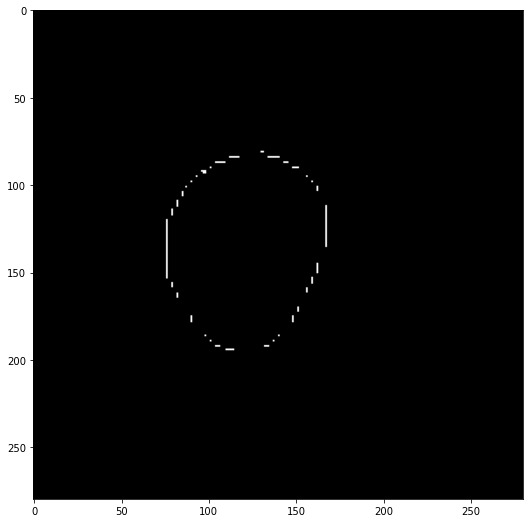

In [8]:
op_img_adv = binarize_adv(img_RGB,30)
large_view(op_img_adv[:,:,2])

In [9]:
#getting edge list
y,x=np.nonzero(op_img_adv[:,:,2])
edge_list = np.array([[_x,_y] for _x,_y in zip(x,y)])

In [10]:
#Ellipse fitting
_ellipse = cv2.fitEllipseDirect(edge_list)
print(_ellipse)

((120.89253997802734, 136.1994171142578), (89.78942108154297, 112.02862548828125), 14.487479209899902)


In [11]:
_ellipse1 = cv2.fitEllipse(edge_list)
print(_ellipse1)

((120.88665008544922, 136.20535278320312), (89.9304428100586, 112.4743881225586), 14.435275077819824)


In [12]:
_ellipse2 = cv2.fitEllipseAMS(edge_list)
print(_ellipse2)

((120.88566589355469, 136.2254180908203), (89.64292907714844, 112.34376525878906), 14.467509269714355)


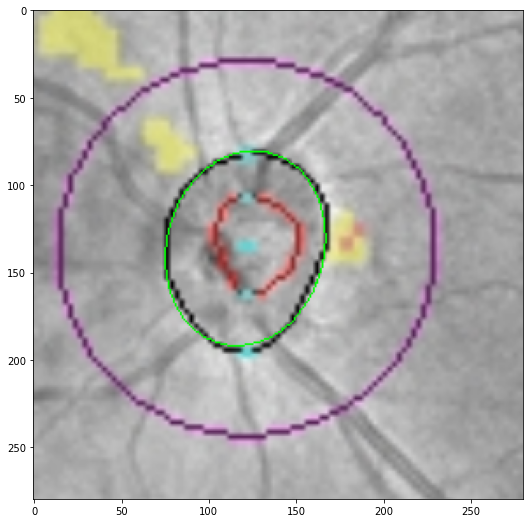

In [13]:
ellipse1_draw = cv2.ellipse(img_RGB.copy(), _ellipse, (0,255,0),1)
ellipse2_draw = cv2.ellipse(img_RGB.copy(), _ellipse1, (0,255,0),1)
ellipse3_draw = cv2.ellipse(img_RGB.copy(), _ellipse2, (0,255,0),1)
large_view(ellipse2_draw)

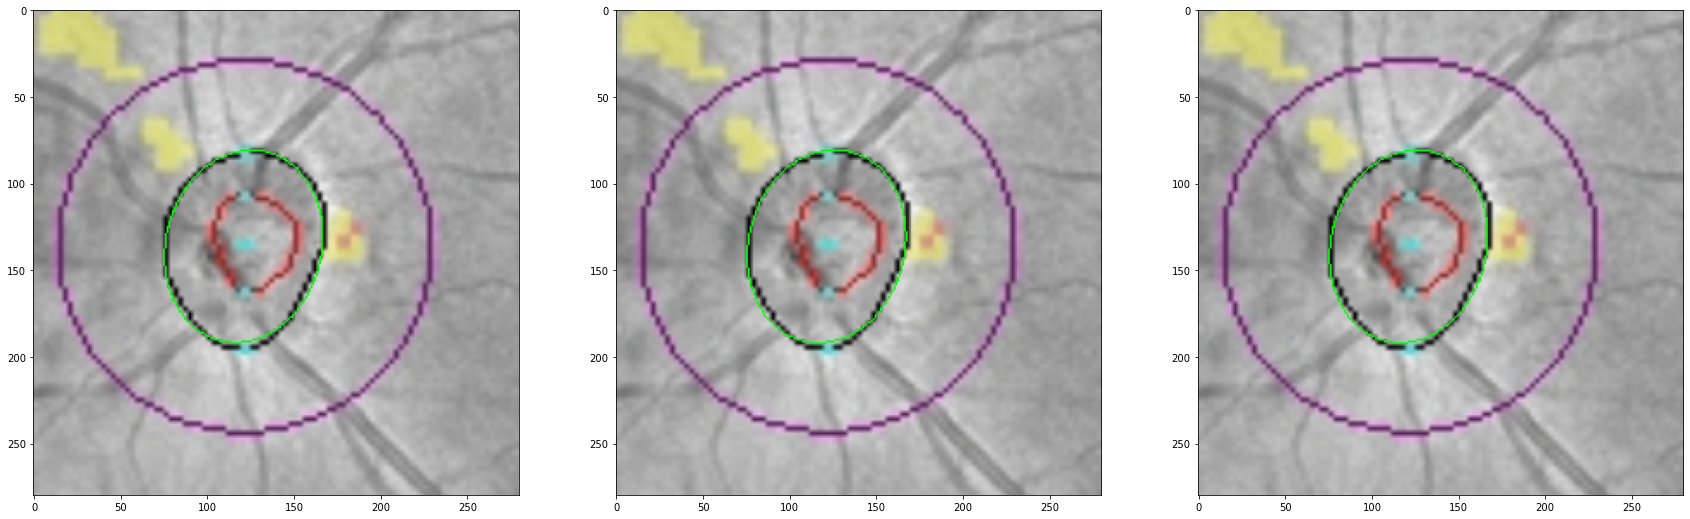

In [14]:
plt.figure(figsize=(40,40))
plt.subplot(1,4,1)
plt.imshow(ellipse1_draw,'gray')
plt.subplot(1,4,2)
plt.imshow(ellipse2_draw,cmap='gray')
plt.subplot(1,4,3)
plt.imshow(ellipse3_draw)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


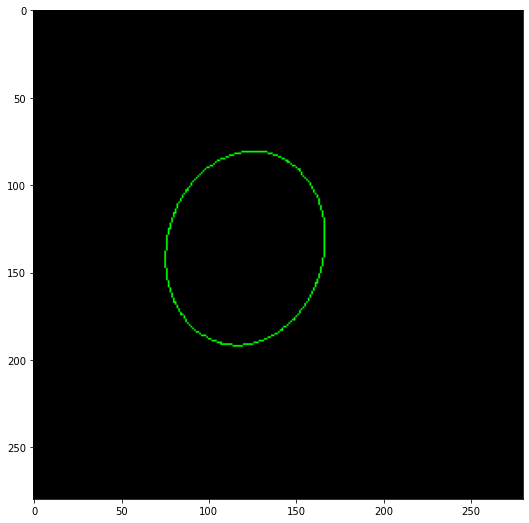

In [16]:
dark = np.zeros(img_RGB.shape)
dark_1 = cv2.ellipse(dark.copy(), _ellipse, (0,255,0),1)
dark_2 = cv2.ellipse(dark.copy(), _ellipse1, (0,255,0),1)
dark_3 = cv2.ellipse(dark.copy(), _ellipse2, (0,255,0),1)
large_view(dark_1)

In [21]:
from skimage.metrics import structural_similarity as ssim
s = ssim(dark_1,dark_3,multichannel=True)

In [22]:
s

0.9979997244006333